In [27]:
#!pip install seaborn

import sys
sys.path.append('/workspaces/ml-supervised-dev')

import pandas as pd
import numpy as np
from src.utils.utils import carrega_dados, encoding_cols, get_x_y, save_model
import matplotlib.pyplot as plt # Para visualização e plots
import seaborn as sns # Para visualização e plots
%matplotlib inline
pd.set_option('display.max_rows', None) # Define o número máximo de linhas que o Pandas irá apresentar

from sklearn.cluster import KMeans # Classe do KMeans usada no sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [17]:
# Carregamento
iris = carrega_dados("Iris.csv", drop_cols=["Id"])
treino, validacao = train_test_split(iris, test_size=0.2)
species_validacao = validacao["Species"]
validacao = validacao.drop("Species", axis=1)
treino = treino.drop("Species", axis=1)

Reorganizando os dados...
Dados carregados


In [ ]:
# Treino
# K = número de grupos
k = 3
kmeans = KMeans(n_clusters=k, max_iter=500)
kmeans.fit(treino)

KMeans(n_clusters=3)

In [19]:
# Labels do KMeans
kmeans.labels_

array([2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0, 1, 1, 0, 2, 2, 2, 1, 1, 0,
       1, 0, 1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2,
       1, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 1,
       2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 2, 1, 0, 0, 1, 1], dtype=int32)

In [20]:
# Predict
kmeans.predict(validacao)

array([0, 0, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1], dtype=int32)

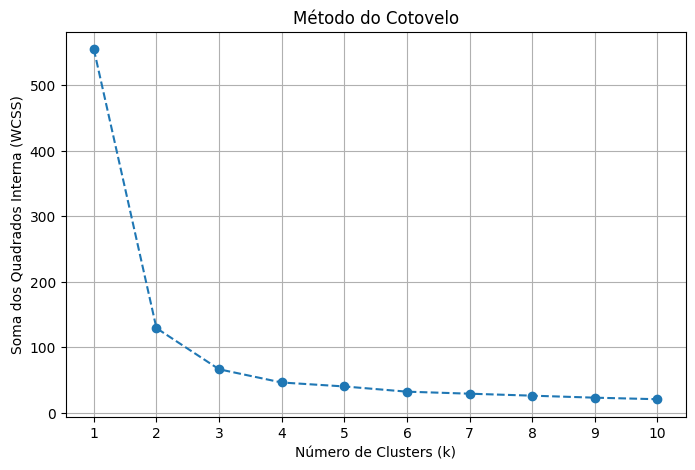

In [16]:
# Elbow
wcss = []  # Lista para armazenar os WCSS

# # Testar K de 1 até 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(treino)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Quadrados Interna (WCSS)')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

In [31]:
# Colunas validação
#validacao["Grupo KMeans"] = kmeans.predict(validacao)
#validacao["Especies Reais"] = species_validacao

validacao[validacao["Especies Reais"]=="Iris-versicolor"]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Grupo KMeans,Especies Reais
83,6.0,2.7,5.1,1.6,2,Iris-versicolor
73,6.1,2.8,4.7,1.2,2,Iris-versicolor
82,5.8,2.7,3.9,1.2,2,Iris-versicolor
65,6.7,3.1,4.4,1.4,2,Iris-versicolor
66,5.6,3.0,4.5,1.5,2,Iris-versicolor
52,6.9,3.1,4.9,1.5,0,Iris-versicolor
94,5.6,2.7,4.2,1.3,2,Iris-versicolor
61,5.9,3.0,4.2,1.5,2,Iris-versicolor


In [28]:
# PCA
centroids = kmeans.cluster_centers_
pca = PCA(2)
x_pca = pca.fit_transform(treino)
centroids_pca = pca.transform(centroids)

/workspaces/ml-supervised-dev/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


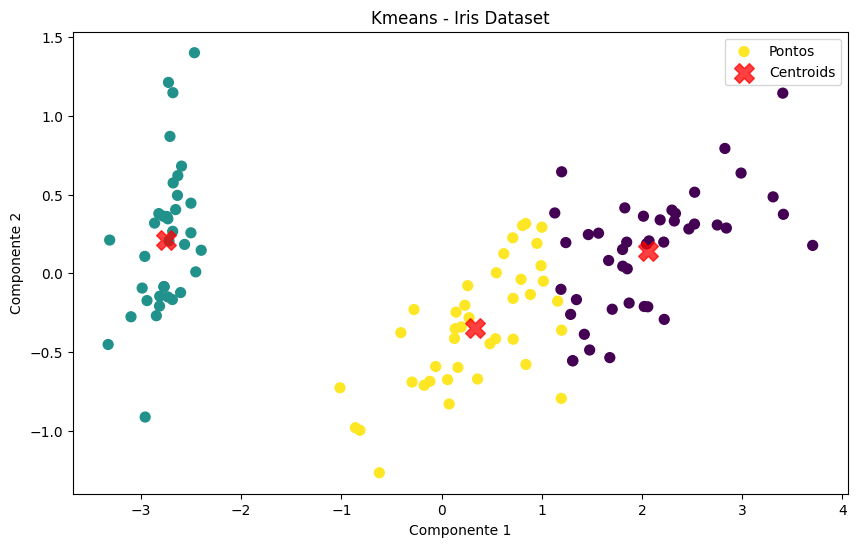

In [29]:
# Visualização dos grupos
plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans.labels_, s=50, cmap='viridis', label="Pontos")
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c="red", s=200, alpha=0.75, marker="X", label="Centroids")
plt.title("Kmeans - Iris Dataset")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
plt.show()